<a href="https://colab.research.google.com/github/manvendra-07/DL-Lab/blob/main/Week%205/200968146_DL_Week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing the required libraries

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

## A little information about the dataset :

#### The dataset used for this problem is **California Housing Dataset**

- This dataset contains 8 features :
> 1. longitude
> 2. latitude
> 3. housingMedianAge
> 4. totalRooms
> 5. totalBedrooms
> 6. population
> 7. households
> 8. medianIncome

- This dataset contain 1 target :
> medianHouseValue

- This dataset contain 20,640 instances




In [2]:
housing = fetch_california_housing(as_frame=True)
housing.frame.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [3]:
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [4]:
Y = housing.frame['MedHouseVal']
X = housing.frame.drop(columns = ['MedHouseVal'], axis = 1)

## Function to perfrom MinMax Scaling over the data

In [5]:
def scaling(X, Y):
  scaler = MinMaxScaler()
  scaled_data = scaler.fit_transform(X, Y)
  X = scaled_data[:,0:8]
  Y = scaled_data[:,-1]
  return X, Y

## Buidling 1-Hidden Layer MLP Model using Sequential API

In [6]:
def MLPmodel(batch_norm):

  model = tf.keras.Sequential()
  model.add(tf.keras.layers.InputLayer(input_shape=8, name="Input-Layer"))

  if batch_norm is 'yes': ## Add a layer of batch normalisation to the input
        model.add(tf.keras.layers.BatchNormalization(scale=True, name = 'Norm-1')) ## Since the next layer is not a linear layer so scaling has to be done

  model.add(tf.keras.layers.Dense(30, activation='relu', name="Hidden-Layer-1"))
  model.add(tf.keras.layers.Dense(1, activation='linear', name='Output-Layer'))

  model.summary()
  model.compile(loss="mean_squared_error", optimizer=tf.keras.optimizers.Adam(learning_rate = 0.0001), metrics=[tf.keras.metrics.MeanSquaredError(name = 'mse')])

  return model

## Splitting the data into Test and Train set

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)

## Training and Testing the MLP Model without MinMax Scaling but using BatchNormalization

In [8]:
mlp_norm = MLPmodel(batch_norm = 'yes')
history = mlp_norm.fit(X_train, Y_train, batch_size = 32, epochs = 20, validation_split=0.3, verbose=1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Norm-1 (BatchNormalization)  (None, 8)                32        
                                                                 
 Hidden-Layer-1 (Dense)      (None, 30)                270       
                                                                 
 Output-Layer (Dense)        (None, 1)                 31        
                                                                 
Total params: 333
Trainable params: 317
Non-trainable params: 16
_________________________________________________________________
Epoch 1/20
317/317 [==============================] - 2s 4ms/step - loss: 3.3031 - mse: 3.3031 - val_loss: 2.4898 - val_mse: 2.4898
Epoch 2/20
317/317 [==============================] - 9s 30ms/step - loss: 2.1232 - mse: 2.1232 - val_loss: 2.3952 - val_mse: 2.3952
Epoch 3/20
317/317 [==============================] - 2s

In [9]:
mlp_norm_test = mlp_norm.evaluate(X_test, Y_test)
mlp_norm_test

194/194 [==============================] - 0s 2ms/step - loss: 0.5689 - mse: 0.5689


[0.5688691735267639, 0.5688691735267639]

## Testing the MLP Model using MinMax Scaler but without BatchNormalization

In [10]:
X_scaled, Y_scaled = scaling(X, Y)
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y_scaled, test_size = 0.3, random_state = 42) # Spliting the data into Test and Train 

In [11]:
mlp = MLPmodel(batch_norm = 'no')
mlp_history = mlp.fit(X_train, Y_train, batch_size = 32, epochs = 20, validation_split = 0.3, verbose = 1)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden-Layer-1 (Dense)      (None, 30)                270       
                                                                 
 Output-Layer (Dense)        (None, 1)                 31        
                                                                 
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
317/317 [==============================] - 1s 3ms/step - loss: 0.3134 - mse: 0.3134 - val_loss: 0.1506 - val_mse: 0.1506
Epoch 2/20
317/317 [==============================] - 2s 6ms/step - loss: 0.0777 - mse: 0.0777 - val_loss: 0.0365 - val_mse: 0.0365
Epoch 3/20
317/317 [==============================] - 5s 15ms/step - loss: 0.0266 - mse: 0.0266 - val_loss: 0.0195 - val_mse: 0.0195
Epoch 4/20
317/317 [==============================] - 1

In [12]:
mlp_test = mlp.evaluate(X_test, Y_test)
mlp_test

194/194 [==============================] - 0s 1ms/step - loss: 3.5051e-04 - mse: 3.5051e-04


[0.0003505069180391729, 0.0003505069180391729]

### Using Batch Normalization or not ?

- As seen that although Batch Normalization does help with the Normalization
- Using MinMax Scaler is stil a good practice as even with Normalization the loss starts to converge from a very big value which can be avoided simply using a MinMax Scaler
- The difference between the **Test MSE** of both models is very much so it can't be ignored **(0.5 vs 3e-4) approx**

## Visualising the MSE for the MLP Model

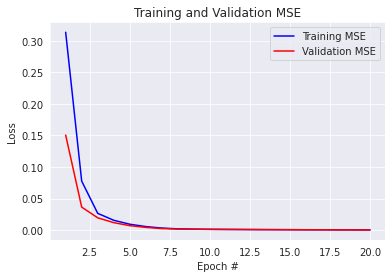

In [13]:
sns.set_style("darkgrid")
train_mse = mlp_history.history['mse']
valid_mse = mlp_history.history['val_mse']
epochs = range(1, len(valid_mse) + 1)

plt.figure()

#Train and validation loss

plt.plot(epochs, train_mse, 'b', label='Training MSE')
plt.plot(epochs, valid_mse, 'r', label='Validation MSE')
plt.xlabel('Epoch #')
plt.ylabel('Loss')
plt.title('Training and Validation MSE')
plt.legend()

plt.show()

## Comment on the overall accuracy

- Using the MLP Classifier we get very good **Train MSE score : 4e-04** and **Test MSE Score : 3e-04**
- It being a simple 1 hidden layer model giving this result is very good.
- Therefore, it is doing a very good job with this regression problem.
- Although the dataset is small there doesn't seem to be any overfitting happening

## Buidling Deep and Wide Neural Network through Functional API

In [14]:
def Deep_Wide_Network():
  inputA = tf.keras.layers.Input(shape=5, name = 'Input-A')
  inputB = tf.keras.layers.Input(shape=6, name = 'Input-B')
  dense1 = tf.keras.layers.Dense(30, activation = 'relu', name = "Hidden-1")
  x1 = dense1(inputB)
  dense2 = tf.keras.layers.Dense(30, activation = 'relu', name = 'Hidden-2')
  x2 = dense2(x1)
  concat = tf.keras.layers.Concatenate(axis = 1, name = 'Concat-Layer')([inputA, x2])
  outputs = tf.keras.layers.Dense(1, activation = 'linear', name = "Output-Layer")(concat)

  model = tf.keras.Model(inputs=[inputA, inputB], outputs=outputs, name='Deep_Wide_Model')
  model.compile(loss="mean_squared_error", optimizer=tf.keras.optimizers.Adam(learning_rate = 0.0001), metrics=[tf.keras.metrics.MeanSquaredError(name = 'mse')])
  model.summary()
  return model

In [15]:
deep_wide = Deep_Wide_Network()

Model: "Deep_Wide_Model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Input-B (InputLayer)           [(None, 6)]          0           []                               
                                                                                                  
 Hidden-1 (Dense)               (None, 30)           210         ['Input-B[0][0]']                
                                                                                                  
 Input-A (InputLayer)           [(None, 5)]          0           []                               
                                                                                                  
 Hidden-2 (Dense)               (None, 30)           930         ['Hidden-1[0][0]']               
                                                                                    

## Traning and Testing the Deep and Wide Network

In [16]:
deep_wide_history = deep_wide.fit(x = [X_train[:, 0:5], X_train[:,2:8]], y= Y_train, batch_size = 32, epochs = 20, validation_split=0.3, verbose=1)

Epoch 1/20
317/317 [==============================] - 2s 4ms/step - loss: 0.1204 - mse: 0.1204 - val_loss: 0.0133 - val_mse: 0.0133
Epoch 2/20
317/317 [==============================] - 5s 16ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 3/20
317/317 [==============================] - 2s 7ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 0.0019 - val_mse: 0.0019
Epoch 4/20
317/317 [==============================] - 1s 3ms/step - loss: 0.0018 - mse: 0.0018 - val_loss: 0.0017 - val_mse: 0.0017
Epoch 5/20
317/317 [==============================] - 1s 3ms/step - loss: 0.0016 - mse: 0.0016 - val_loss: 0.0015 - val_mse: 0.0015
Epoch 6/20
317/317 [==============================] - 1s 3ms/step - loss: 0.0015 - mse: 0.0015 - val_loss: 0.0014 - val_mse: 0.0014
Epoch 7/20
317/317 [==============================] - 1s 3ms/step - loss: 0.0013 - mse: 0.0013 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 8/20
317/317 [==============================] - 2s 7ms/step - loss: 0

In [17]:
deep_wide_test = deep_wide.evaluate(x = [X_test[:,0:5], X_test[:,2:8]], y =Y_test)
deep_wide_test

194/194 [==============================] - 0s 1ms/step - loss: 9.7914e-05 - mse: 9.7914e-05


[9.791428601602092e-05, 9.791428601602092e-05]

## Visualising the Deep and Wide Network

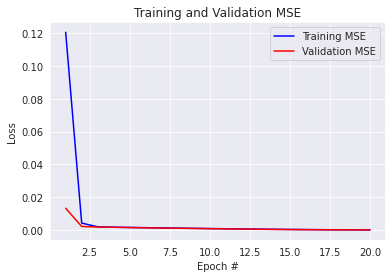

In [18]:
sns.set_style("darkgrid")
train_mse = deep_wide_history.history['mse']
valid_mse = deep_wide_history.history['val_mse']
epochs = range(1, len(valid_mse) + 1)

plt.figure()

#Train and validation loss

plt.plot(epochs, train_mse, 'b', label='Training MSE')
plt.plot(epochs, valid_mse, 'r', label='Validation MSE')
plt.xlabel('Epoch #')
plt.ylabel('Loss')
plt.title('Training and Validation MSE')
plt.legend()

plt.show()

#### Simple Tabulation of all the models

In [20]:
from tabulate import tabulate
table = [['MSE', 'MLP-w/ BatchNorm', 'MLP-w/ MinMaxScale', 'Deep and Wide'],
         ['Train',history.history['val_mse'][-1], mlp_history.history['val_mse'][-1], deep_wide_history.history['val_mse'][-1]],
         ['Test', mlp_norm_test[1], mlp_test[1], deep_wide_test[1]]
        ]

print(tabulate(table, headers='firstrow', tablefmt='fancy_grid'))

╒═══════╤════════════════════╤══════════════════════╤═════════════════╕
│ MSE   │   MLP-w/ BatchNorm │   MLP-w/ MinMaxScale │   Deep and Wide │
╞═══════╪════════════════════╪══════════════════════╪═════════════════╡
│ Train │           0.607661 │          0.0003845   │     0.000110853 │
├───────┼────────────────────┼──────────────────────┼─────────────────┤
│ Test  │           0.568869 │          0.000350507 │     9.79143e-05 │
╘═══════╧════════════════════╧══════════════════════╧═════════════════╛




## Comments on overall accuracy of Deep and Wide Neural Network :

- The model has the best Train and Test MSE among all models
- It very sharply converges to the global optimum
- This model also doesn't overfit the data
- This model performs better than the MLP model giving a better accuracy
- All in all the Deep and Wide Neural Network works the best for this problem




#### **Some observations of the Functional API**

- The main idea is that a deep learning model is usually a directed acyclic graph (DAG) of layers. So the functional API is a way to build graphs of layers. (**from Documentation**)

- Building said DAG functionally using layers gives us more control over how and what we want to do instead of simply following a set pattern.

- This way we can use multiple models and combine them to form a final model
> Which we did while making the Deep and Wide Neural Network (kind of,  not exactly!)

- Also to build a Deep and Wide Network we had divided the input into 2 inputs (InputA, InputB)

- This helped us learn (deeply) over a certain set of features and not learn at all over a certain set of features (altough in this case there was an overlap).

- This shows how our algorithms can be ***better*** optimized and the computational cost can be brought down.